Missing values per column:
 season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
   season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed   cnt  
0  0.363625  0.805833   0.160446   985  
1  0.353739  0.696087   0.248539   801  
2  0.189405  0.437273   0.248309  1349  
3  0.212122  0.590435   0.160296  1562  
4  0.229270  0.436957   0.186900  1600  
R2 Score: 0.8856
RMSE: 677.28
MAE: 429.85


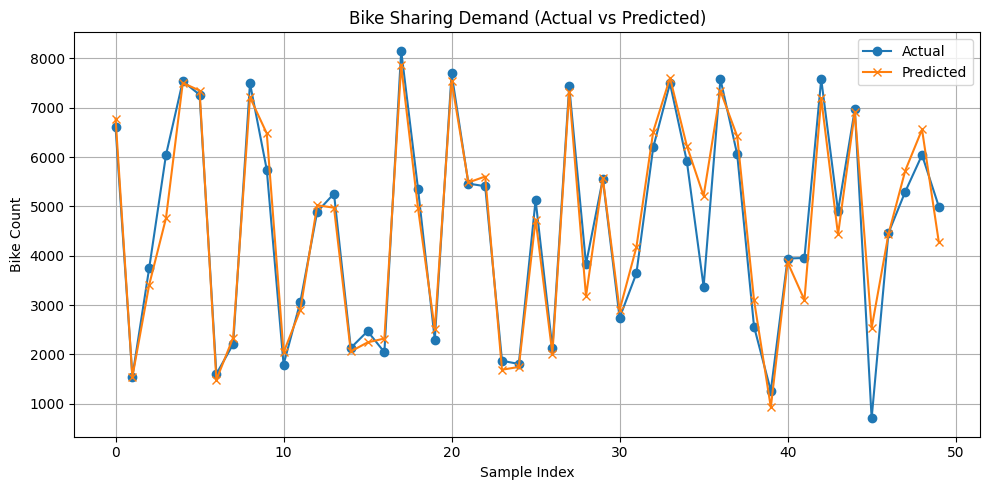

Model and scaler saved in 'D:/ml_lern/model/' folder.
rf_model.pkl size: 5329969 bytes
scaler.pkl size: 1215 bytes


In [ ]:
# Bike Sharing Demand Prediction with Random Forest
#app6.py rf_model scaler .pkl  day.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt  # for RMSE calculation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import joblib
import os

# Step 1: Load and Prepare Data
file_path = 'D:/ml_lern/data/day.csv'  # Adjust if needed
df = pd.read_csv(file_path)

# Drop irrelevant columns
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Display first few rows
print(df.head())

# Step 2: Features and Target
X = df.drop('cnt', axis=1)
y = df['cnt']

# Step 3: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 5: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Step 7: Plot Actual vs Predicted for first 50 samples
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title("Bike Sharing Demand (Actual vs Predicted)")
plt.xlabel("Sample Index")
plt.ylabel("Bike Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Save Model and Scaler
#os.makedirs("model", exist_ok=True)  # Create folder if not exist
# Ensure directory exists
os.makedirs("D:/ml_lern/model", exist_ok=True)

# Save model and scaler with absolute paths
joblib.dump(model, 'D:/ml_lern/model/rf_model.pkl')
joblib.dump(scaler, 'D:/ml_lern/model/scaler.pkl')

print("Model and scaler saved in 'D:/ml_lern/model/' folder.")
print(f"rf_model.pkl size: {os.path.getsize('D:/ml_lern/model/rf_model.pkl')} bytes")
print(f"scaler.pkl size: {os.path.getsize('D:/ml_lern/model/scaler.pkl')} bytes")

